# 2º Desafio - alura - imersao dados

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers

### Importando pandas para manipular dfs

In [2]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


### Armazenando a coluna valor com a retirada do sifrão e outros nomes (categoricas)

In [3]:
'''
Transformando e armazenando a coluna valores
Transformando dados de valores a tipo float
limpeza do df
excluindo algumas colunas
'''

dados[['primeira', 'Novo_valor', 'ultima']] = dados['Valor'].str.split(expand=True)
dados = dados.drop(['Valor','primeira', 'ultima'], axis=1)
dados['Novo_valor'] = dados['Novo_valor'].str.replace('.','').astype(float)

/tmp/ipykernel_18523/618260978.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Novo_valor'] = dados['Novo_valor'].str.replace('.','').astype(float)


In [4]:
dados.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Novo_valor
9730,Rua Alcindo Bueno de Assis,Barro Branco (Zona Norte),São Paulo,355,3,4,4,2300000.0
9722,Praça Paul Harris,Indianópolis,São Paulo,597,5,6,6,5500000.0
4225,NaN,Jardim Eliana,São Paulo,125,2,2,2,250000.0
8735,NaN,Vila Cláudia,São Paulo,171,3,2,2,1350000.0
473,Alameda dos Indígenas,Planalto Paulista,São Paulo,312,3,3,5,1900000.0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rua         6574 non-null   object 
 1   Bairro      9996 non-null   object 
 2   Cidade      10008 non-null  object 
 3   Metragem    10008 non-null  int64  
 4   Quartos     10008 non-null  int64  
 5   Banheiros   10008 non-null  int64  
 6   Vagas       10008 non-null  int64  
 7   Novo_valor  10008 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 625.6+ KB


### Importando seaborn and matplot.pyplot para plotar uns gráficos

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

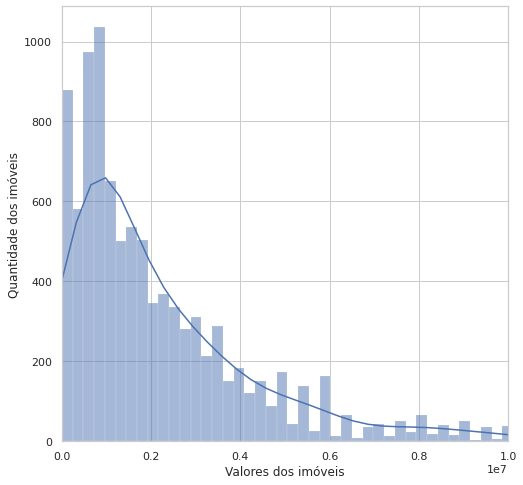

In [43]:
plt.figure(figsize=(8,8))
sns.histplot(data = dados, x='Novo_valor', kde=True, palette='terrain')
plt.xlabel('Valores dos imóveis')
plt.ylabel('Quantidade dos imóveis')
plt.xlim(0,10000000)
plt.show()